In [19]:
import numpy as np
import pandas as pd
import re
import scipy as sp
import xarray as xr
from scipy import integrate
from matplotlib import pyplot as plt

In [20]:
df=pd.read_csv('global.1751_2014.csv')
df

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
259,2010,9128,1696,3107,3812,446,67,1.32
260,2011,9503,1756,3134,4055,494,64,1.36
261,2012,9673,1783,3200,4106,519,65,1.36
262,2013,9773,1806,3220,4126,554,68,1.36


In [21]:
dfo=pd.read_csv('co2_annmean_mlo.csv')
dfo=dfo.loc[(dfo['year'] >1985)&(dfo['year'] <2005)][['year','mean']]
dfo



,year,mean
27,1986,347.61
28,1987,349.31
29,1988,351.69
30,1989,353.20
31,1990,354.45
32,1991,355.70
33,1992,356.54
34,1993,357.21
35,1994,358.96
36,1995,360.97


In [22]:
def model(z, t):
    x,y = z
    k1 = 105/740
    k2 = 102/900
    a = df.loc[df['Year']== int(t)]['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].values
    c= a[0]/(1000 *2.13)
    dN1dt = -k1 * x + k2 * y + c
    dN2dt = k1 * x - k2 * y
    return [dN1dt,dN2dt]

#初始值
z0=[740/2.13,900/2.13]
t = np.linspace(1986,2005,20)
f = integrate.odeint(model, z0, t)
data1=f[2:,0]
data1

array([349.88436184, 351.22164557, 352.59351214, 353.9447337 ,
       355.30665335, 356.62213954, 357.92322284, 359.26191472,
       360.64647697, 362.07799613, 363.53724585, 364.98443808,
       366.40788035, 367.89425939, 369.43221733, 370.99178029,
       372.69610639, 374.52395581])

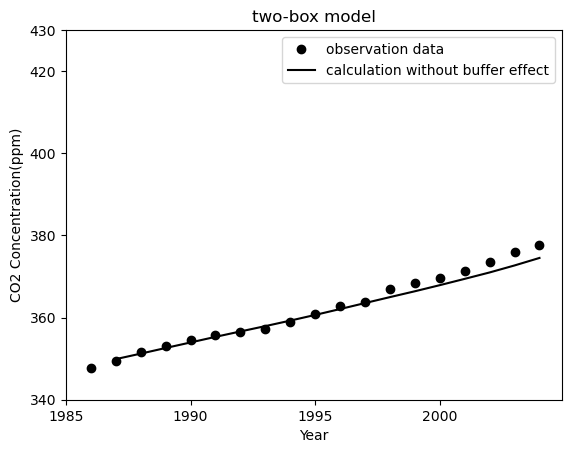

In [23]:
plt.plot(dfo['year'],dfo['mean'],'ok',label='observation data')
plt.plot([i for i in range(1987,2005)],data1,'k',label='calculation without buffer effect')
plt.title('two-box model')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend()
plt.show()

In [24]:
def modelbuf(z, t):
    x,y = z
    k1 = 105/740
    k2 = 102/900
    N20 = 821/2.13
    zeta= 3.69 + 0.0186 * x - 1.8*(1e-6) * x * x
    a = df.loc[df['Year']== int(t)]['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].values
    c= a[0]/(1000 *2.13)
    dN1dt = -k1 * x + k2 * (N20 + zeta*(y - N20)) + c
    dN2dt = k1 * x - k2 * (N20 + zeta*(y - N20))
    return [dN1dt,dN2dt]
z0=[740/2.13,900/2.13]
t = np.linspace(1986,2005,20)
fbuff = integrate.odeint(modelbuf, z0, t)
data2=fbuff[2:,0]
data2

array([379.10119749, 383.23288806, 386.24698967, 388.9473252 ,
       391.59482235, 394.19163089, 396.78162276, 399.41915257,
       402.11554372, 404.87554574, 407.68314119, 410.49923152,
       413.3096961 , 416.19983991, 419.16147407, 422.1675708 ,
       425.34585932, 428.68548213])

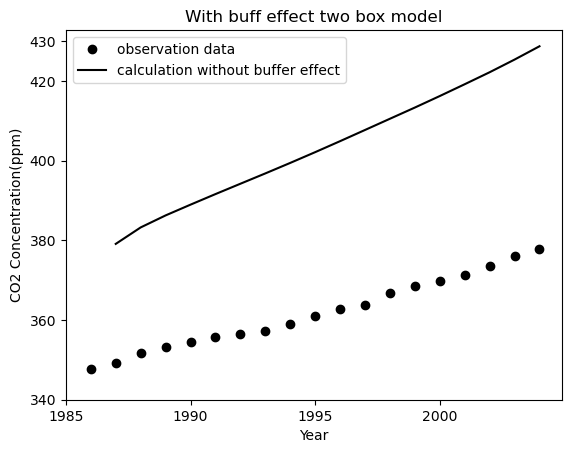

In [25]:
plt.plot(dfo['year'],dfo['mean'],'ok',label='observation data')
plt.plot([i for i in range(1987,2005)],data2,'k',label='calculation without buffer effect')
plt.title('With buff effect two box model')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend()
plt.show()

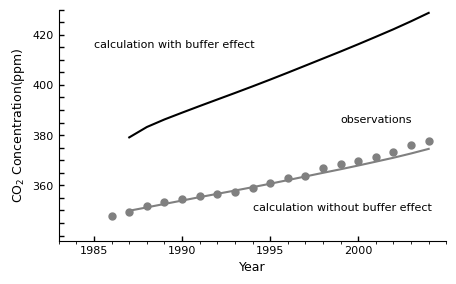

In [26]:
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(1, 1, 1)
plt.plot(dfo['year'],dfo['mean'],'o',markersize=5,color='grey')
plt.plot([i for i in range(1987,2005)],data1,'grey')
plt.plot([i for i in range(1987,2005)],data2,'k')
plt.xticks([1985,1990,1995,2000])
plt.yticks([360,380,400,420])
plt.xlim(1983,2005)
plt.ylim(338,430)
plt.xlabel('Year',fontsize=9)
plt.ylabel('CO$_{2}$ Concentration(ppm)',fontsize=9)
ax.tick_params(labelsize=8)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.minorticks_on()
ax.tick_params(axis='y',which='both',direction='in',width=1,length=3.5)
ax.tick_params(axis='x',which='major',direction='in',width=1,length=3.5)
ax.text(1985,415,'calculation with buffer effect',fontsize=8)
ax.text(1994,350,'calculation without buffer effect',fontsize=8)
ax.text(1999,385,'observations',fontsize=8)
plt.show()

In [27]:
land_use=pd.read_csv('landuse.csv')

def model7box(z, t):
    Atmos,SO,IO,DO,Sed,Bio,Soil = z
    k12 = 60/615
    k21 = 60/842
    k23 = 9/842
    k24 = 43/842
    k32 = 52/9744
    k34 = 162/9744
    k43 = 205/26280
    k45 = 0.2/26280
    k51 = 0.2/90000000
    k67 = 62/731
    k71 = 62/1328
    N20 = 821

    zeta= 3.69 + 0.0186 * Atmos - 1.8*(1e-6) * Atmos * Atmos

    a = df.loc[df['Year']== int(t)]['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].values
    c= a[0]/(1000*2.13)
    c=float(c)
    l = land_use.loc[land_use['Year']== int(t)]['Global'].values
    L =l[0]/2.13/1000
    L=float(L)
    f = 62*(1+0.38*(np.log(a/(615*2.13))))
    f=float(f)
    dN1dt = -k12*Atmos+k21*(N20 + zeta*(SO - N20))+c-f+L+k51*Sed+k71*Soil
    dN2dt = k12*Atmos-k21*(N20 + zeta*(SO - N20))-k23*SO+k32*IO-k24*SO
    dN3dt = k23*SO-k32*IO-k34*IO+k43*DO
    dN4dt = k34*IO-k43*DO+k24*SO-k45*DO
    dN5dt = k45*DO-k51*Sed
    dN6dt = f-k67*Bio-2*L
    dN7dt = k67*Bio-k71*Soil+L
    return [dN1dt,dN2dt,dN3dt,dN4dt,dN5dt,dN6dt,dN7dt]

z0=[615/2.13,842/2.13,9744/2.13,26280/2.13,90000000/2.13,731/2.13,1238/2.13]
t = np.linspace(1851,2001,151)
data3= integrate.odeint(model7box, z0, t)
data3=data3[0:,0]
#model7box(z0,1888)
data3

C:\Users\WIN11\AppData\Local\Temp\ipykernel_22652\3027334323.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f=float(f)


array([ 288.73239437,  177.41132881,  144.85892254,  138.19484337,
        138.97057575,  144.16338522,  150.08816097,  156.72076303,
        163.33120527,  168.53365962,  171.67740163,  173.87378077,
        175.45152435,  175.29862233,  173.4303336 ,  170.22006957,
        166.45327999,  161.25138922,  155.27904418,  148.28205652,
        140.68151351,  131.99661592,  121.47725378,  110.24049901,
        100.78372863,   89.98539639,   79.45022525,   69.15672734,
         59.22077892,   48.45044494,   36.17073664,   24.5805763 ,
         13.06822844,    1.57362384,   -8.80740381,  -18.18289354,
        -26.81830469,  -35.41417887,  -44.82530615,  -52.66569719,
        -60.91629509,  -68.4846299 ,  -74.74793777,  -79.7557187 ,
        -84.63812197,  -89.69302911,  -94.21794529,  -98.61000425,
       -102.90512478, -107.55628092, -111.69080607, -115.11449847,
       -117.95478432, -121.39258581, -123.79058336, -126.40031301,
       -129.06743488, -132.29986838, -133.39060424, -134.87550

In [28]:
df2=pd.read_csv('global.1751_2014.csv')
df2

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
259,2010,9128,1696,3107,3812,446,67,1.32
260,2011,9503,1756,3134,4055,494,64,1.36
261,2012,9673,1783,3200,4106,519,65,1.36
262,2013,9773,1806,3220,4126,554,68,1.36
